Imports necesarios

In [18]:
from generador_cifrado import *
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
from binarios import *
from PIL import Image
import os
from lector import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parte 1

In [19]:
clave = b"0123456789abcdef0123456789abcdef"
clave = bytes(clave)

ruta_imagen = "ayno_encrypted_image.jpeg"
contenido_imagen = leer_imagen(ruta_imagen)

# Convertiendo las cadenas de bits en bytes (supongo que ya lo has hecho)
contenido_imagen_bytes = bytes(int(bits, 2) for bits in contenido_imagen)

# Creando el objeto de cifrado AES en modo ECB
cipher_decrypt = AES.new(clave, AES.MODE_ECB)

# Desencriptando el contenido
contenido_desencriptado = cipher_decrypt.decrypt(contenido_imagen_bytes)


ruta_imagen_desencriptada = "ayno_decrypted_image_aes.jpeg"
with open(ruta_imagen_desencriptada, "wb") as archivo_salida:
    archivo_salida.write(contenido_desencriptado)

print(f"Imagen desencriptada guardada en {ruta_imagen_desencriptada}")

TypeError: int() can't convert non-string with explicit base

In [ ]:
def decrypt_image(file_name, key, iv):
    key = bytes.fromhex(key)
    if len(key) != 16:
        raise ValueError("La clave debe ser de 16 bytes")

    iv = bytes.fromhex(iv)
    if len(iv) != 16:
        raise ValueError("El IV debe ser de 16 bytes")

    cipher = AES.new(key, AES.MODE_CBC, iv=iv)

    with open(file_name, 'rb') as f:
        encrypted_data = f.read()

    # Desencriptando los datos
    decrypted_data = unpad(cipher.decrypt(encrypted_data), AES.block_size)

    with open("decrypted_" + file_name, 'wb') as f:
        f.write(decrypted_data)

decrypt_image("ayno_encrypted_image.jpeg", "02e9bf37e279e73aa93a3b0fc3bfed8f", "0123456789abcdef0123456789abcdef")

In [ ]:
def decrypt_image(file_name, key):
    key = bytes.fromhex(key)
    if len(key) != 16:
        raise ValueError("La clave debe ser de 16 bytes")

    # Creando un objeto AES en modo ECB
    cipher = AES.new(key, AES.MODE_ECB)

    # Lee los datos cifrados del archivo
    with open(file_name, 'rb') as f:
        encrypted_data = f.read()

    # Desencriptando los datos
    decrypted_data = unpad(cipher.decrypt(encrypted_data), AES.block_size)

    with open("decrypted_" + file_name, 'wb') as f:
        f.write(decrypted_data)

decrypt_image("mr-increible_encrypted_image.jpeg", "406845db899854cc23484d6f3f28f3f7")


La diferencia que se puede notar a primera vista entre la encriptada usando ECB y CBC es que CBC necesita una llave más para poder encriptar la imagen o el texto que se desee esconder. Asimismo, con esta diferencia se puede observar que el algoritmo CBC tiene una capa más de seguridad tanto sobre los datos como sobre los datos que está encriptado. Por otro lado, es de alta importancia mencionar que dependiendo de que información se está encriptado así es como de debe escoger el algoritmo, dado que si se tiene información no tan confidencial, se podría usar el algoritmo ECB. Sin embargo, si se está encriptado información como contraseñas, información personal, etc. se debe escoger el algoritmo CBC u otros que sea más robustos. Por otro lado se pudo observar que el algoritmo ECB fue capaz de descifrar la imagen de mr-incredible_encripted.jpeg. Finalmente, se pudo observar que tanto el algoritmo ECB y el CBC no pudieron descifrar el archivo de ayno_encrypted.jpeg.

# Parte 2

Datos importantes: 

K: fb0e35fe2ea45bdd51f0f01478fa1853
IV: f05c974d0f16af3795dc92718f0ce7e9

Comandos: 

ECB:  enc -aes-128-ecb -nosalt -in tux.ppm -out encrypted_body_ecb.ppm -K fb0e35fe2ea45bdd51f0f01478fa1853



CBC: enc -aes-128-cbc -nosalt -in tux.ppm -out encrypted_body_cbc.ppm -K fb0e35fe2ea45bdd51f0f01478fa1853 -iv f05c974d0f16af3795dc92718f0ce7e9

Abriendo el archivo con el ECB.

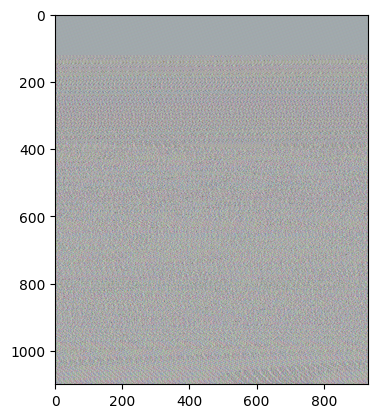

In [ ]:
# Cargando la imagen
ruta_imagen = "encrypted_body_ecb.ppm"
img = mpimg.imread(ruta_imagen)

# Muestra la imagen
plt.imshow(img)
plt.show()

A primera vista, lo que se puede observar es que la imagen contiene varios colores, pero se ve principalmente gris. Lo anterior se puede deber a que se busca que la imagen esté completamente "tapada" para no saber su contenido. Asimismo, se puede ver que la imagen encriptada no coincide en nada con la imagen original.

Abriendo el archivo con el CBC.

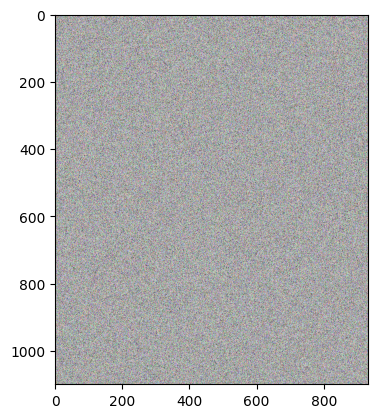

In [20]:
# Cargando la imagen
ruta_imagen = "encrypted_body_cbc.ppm"
img = mpimg.imread(ruta_imagen)

plt.imshow(img)
plt.show()

A primera vista, y al igual que la imagen encriptada anteriormente, lo que se puede observar es que la imagen contiene varios colores, pero se ve principalmente gris. Lo anterior se puede deber a que se busca que la imagen esté completamente "tapada" para no saber su contenido. Asimismo, se puede ver que la imagen encriptada no coincide en nada con la imagen original.